In [8]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [9]:
CSV_HEADER = [
 'Status of aneurysm_Ruptured',
 'Diabetes',
 'Hypertension',
 'Heart Disease',
 'COPD',
 'Polycystic Kidney Disese',
 'Family_history',
 'Gender_Female',
 'Gender_Male',
 'Gender_Transgender Female / Male-to-Female',
 'Side_Bilateral',
 'Side_Left',
 'Side_Right',
 'Side_Unknown',
 'Side_at Bifurcation',
 'Smoking History_Current Smoker',
 'Smoking History_Former Smoker',
 'Smoking History_Never Smoked',
 'diplopia_No',
 'diplopia_Unknown',
 'diplopia_Yes',
 'blurred vision_No',
 'blurred vision_Unknown',
 'blurred vision_Yes',
 'New_Loc_Anterior Communicating Artery',
 'New_Loc_BA SCA',
 'New_Loc_Basilar Tip',
 'New_Loc_Basilar Trunk',
 'New_Loc_Carotid Terminus',
 'New_Loc_Cavernous Carotid',
 'New_Loc_Distal Branch',
 'New_Loc_Extra-Cranial: Internal Carotid',
 'New_Loc_ICA',
 'New_Loc_MCA',
 'New_Loc_PCA',
 'New_Loc_PICA',
 'New_Loc_Paraclinoid',
 'New_Loc_Pericallosal',
 'New_Loc_SICA',
 'New_Loc_Vertebral Artery',
 'age_category_Baby Boomers',
 'age_category_Gen - X',
 'age_category_Gen - Y',
 'age_category_Silent Generation',
 'size_category_giant',
 'size_category_large',
 'size_category_medium',
 'size_category_small',
 'size_category_tiny',
 'Ethnicity_Asian/Oriental',
 'Ethnicity_Black/African American',
 'Ethnicity_Native American/American Indian',
 'Ethnicity_White/Caucasian'
]

print("Len CSV_HEADER: " + str(len(CSV_HEADER)))

Len CSV_HEADER: 53


In [10]:
"""
data = pd.read_csv(f"./data/tab_aneurysm_data.csv")
data = data.drop(['Record ID', 'Status of aneurysm_Un-Ruptured', 'Status of aneurysm_Unknown'], axis=1)
status_col = data.pop('Status of aneurysm_Ruptured')
data.insert(0, 'Status of aneurysm_Ruptured', status_col)

category_mapping = {1: 'ruptured', 0: 'unruptured'}
data['Status of aneurysm_Ruptured'] = data['Status of aneurysm_Ruptured'].map(category_mapping)


data.to_csv("./data/tab_aneurysm_data.csv", index=False)
"""

'\ndata = pd.read_csv(f"./data/tab_aneurysm_data.csv")\ndata = data.drop([\'Record ID\', \'Status of aneurysm_Un-Ruptured\', \'Status of aneurysm_Unknown\'], axis=1)\nstatus_col = data.pop(\'Status of aneurysm_Ruptured\')\ndata.insert(0, \'Status of aneurysm_Ruptured\', status_col)\n\ncategory_mapping = {1: \'ruptured\', 0: \'unruptured\'}\ndata[\'Status of aneurysm_Ruptured\'] = data[\'Status of aneurysm_Ruptured\'].map(category_mapping)\n\n\ndata.to_csv("./data/tab_aneurysm_data.csv", index=False)\n'

In [11]:
data = pd.read_csv(f"./data/tab_aneurysm_data.csv", header=None, names=CSV_HEADER)

data = data[1:]

X = data.drop(['Status of aneurysm_Ruptured'], axis=1)
y = data['Status of aneurysm_Ruptured']

# Perform the train-test split (70% train, 30% combined validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=4)

# Further split the temporary set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Save the training and testing data to CSV files
oversample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Save the training and testing data to CSV files
train_data = pd.concat([y_train, X_train], axis=1)
test_data = pd.concat([y_test, X_test], axis=1)
val_data = pd.concat([y_val, X_val], axis=1)

print(f"Train dataset shape: {train_data.shape}")
print(f"Test dataset shape: {test_data.shape}")
print(f"Val dataset shape: {val_data.shape}")

y_train.value_counts()

Train dataset shape: (524, 53)
Test dataset shape: (291, 53)
Val dataset shape: (290, 53)


Status of aneurysm_Ruptured
ruptured      262
unruptured    262
Name: count, dtype: int64

In [12]:
y_test.value_counts()

Status of aneurysm_Ruptured
unruptured    230
ruptured       61
Name: count, dtype: int64

In [13]:
y_val.value_counts()

Status of aneurysm_Ruptured
unruptured    220
ruptured       70
Name: count, dtype: int64

In [14]:
import numpy as np

def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

'''
# Assuming 'y' contains the class labels (0s and 1s) for the binary classification problem
class_weights = calculate_class_weights(y)
class_weights = {0: class_weights['ruptured'], 1: class_weights['unruptured']}
print("Class weights:", class_weights)
'''

'\n# Assuming \'y\' contains the class labels (0s and 1s) for the binary classification problem\nclass_weights = calculate_class_weights(y)\nclass_weights = {0: class_weights[\'ruptured\'], 1: class_weights[\'unruptured\']}\nprint("Class weights:", class_weights)\n'

In [15]:
train_data_file = "train_data_An.csv"
test_data_file = "test_data_An.csv"
val_data_file = "val_data_An.csv"

train_data.to_csv(train_data_file, index=False, header=False)
test_data.to_csv(test_data_file, index=False, header=False)
val_data.to_csv(val_data_file, index=False, header=False)

In [16]:
NUMERIC_FEATURE_NAMES = [
]

CATEGORICAL_FEATURES_WITH_VOCABULARY={}
for feature in CSV_HEADER[1:]: #Not including Rupture Status
    CATEGORICAL_FEATURES_WITH_VOCABULARY[feature]=sorted(list(data[feature].unique()))

# Name of the column to be used as instances weight.
WEIGHT_COLUMN_NAME = "fnlwgt"
# A list of the categorical feature names.
CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())
# A list of all the input features.
FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES
# A list of column default values for each feature.
COLUMN_DEFAULTS = [
    ["NA"] for feature_name in CSV_HEADER
]
# The name of the target feature.
TARGET_FEATURE_NAME = "Status of aneurysm_Ruptured"
# A list of the labels of the target features.
TARGET_LABELS = ["ruptured", "unruptured"]

In [17]:
CATEGORICAL_FEATURES_WITH_VOCABULARY

{'Diabetes': ['0', '1'],
 'Hypertension': ['0', '1'],
 'Heart Disease': ['0', '1'],
 'COPD': ['0', '1'],
 'Polycystic Kidney Disese': ['0', '1'],
 'Family_history': ['0', '1'],
 'Gender_Female': ['0', '1'],
 'Gender_Male': ['0', '1'],
 'Gender_Transgender Female / Male-to-Female': ['0', '1'],
 'Side_Bilateral': ['0', '1'],
 'Side_Left': ['0', '1'],
 'Side_Right': ['0', '1'],
 'Side_Unknown': ['0', '1'],
 'Side_at Bifurcation': ['0', '1'],
 'Smoking History_Current Smoker': ['0', '1'],
 'Smoking History_Former Smoker': ['0', '1'],
 'Smoking History_Never Smoked': ['0', '1'],
 'diplopia_No': ['0', '1'],
 'diplopia_Unknown': ['0', '1'],
 'diplopia_Yes': ['0', '1'],
 'blurred vision_No': ['0', '1'],
 'blurred vision_Unknown': ['0', '1'],
 'blurred vision_Yes': ['0', '1'],
 'New_Loc_Anterior Communicating Artery': ['0', '1'],
 'New_Loc_BA SCA': ['0', '1'],
 'New_Loc_Basilar Tip': ['0', '1'],
 'New_Loc_Basilar Trunk': ['0', '1'],
 'New_Loc_Carotid Terminus': ['0', '1'],
 'New_Loc_Cavernous C

In [18]:
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001
DROPOUT_RATE = 0.2
BATCH_SIZE = 32
NUM_EPOCHS = 30

NUM_TRANSFORMER_BLOCKS = 5  # Number of transformer blocks.
NUM_HEADS = 4  # Number of attention heads.
EMBEDDING_DIMS = 16  # Embedding dimensions of the categorical features.
MLP_HIDDEN_UNITS_FACTORS = [
    2,
    1,
]  # MLP hidden layer units, as factors of the number of inputs.
NUM_MLP_BLOCKS = 2  # Number of MLP blocks in the baseline model.

In [19]:
target_label_lookup = layers.StringLookup(
    vocabulary=TARGET_LABELS, mask_token=None, num_oov_indices=0
)

def prepare_example(features, target):
    # print(target)
    target_index = target_label_lookup(target)
    return features, target_index


def get_dataset_from_csv(csv_file_path, batch_size=128, shuffle=False):
    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=CSV_HEADER,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=False,
        na_value="?",
        shuffle=False,
    ).map(prepare_example, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)
    return dataset.cache()

In [20]:
np.random.seed(0)
tf.random.set_seed(0)
keras.utils.set_random_seed(1)

In [21]:
from keras import backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras
def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())

from sklearn.metrics import roc_auc_score
def get_auroc(y_true, y_pred):
    return tf.numpy_function(roc_auc_score, (y_true, y_pred), tf.double)

In [22]:
def run_experiment(
    model,
    train_data_file,
    test_data_file,
    val_data_file,
    num_epochs,
    learning_rate,
    weight_decay,
    batch_size,
):

    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), get_f1,precision,recall],
    )

    train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=False)
    test_dataset = get_dataset_from_csv(test_data_file, batch_size)
    validation_dataset = get_dataset_from_csv(val_data_file, batch_size)

    print("Start training the model...")
    history = model.fit(
        train_dataset, epochs=num_epochs, validation_data=validation_dataset#, class_weight=class_weights
    )
    print("Model training finished")

    _, accuracy, f1,prec,rec = model.evaluate(test_dataset, verbose=0)
    

    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test f1: {round(f1,6)}")
    print(f"Test accuracy: {round(accuracy,6)}")
    print(f"Test Precision: {round(prec,6 )}")
    print(f"Test Recall: {round(rec,6)}")

    return history

In [23]:
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.float32
            )
        else:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.string
            )
    return inputs

In [24]:
def encode_inputs(inputs, embedding_dims):

    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:

            # Get the vocabulary of the categorical feature.
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]

            # Create a lookup to convert string values to an integer indices.
            # Since we are not using a mask token nor expecting any out of vocabulary
            # (oov) token, we set mask_token to None and  num_oov_indices to 0.
            lookup = layers.StringLookup(
                vocabulary=vocabulary,
                mask_token=None,
                num_oov_indices=0,
                output_mode="int",
            )

            # Convert the string input values into integer indices.
            encoded_feature = lookup(inputs[feature_name])

            # Create an embedding layer with the specified dimensions.
            embedding = layers.Embedding(
                input_dim=len(vocabulary), output_dim=embedding_dims
            )

            # Convert the index values to embedding representations.
            encoded_categorical_feature = embedding(encoded_feature)
            encoded_categorical_feature_list.append(encoded_categorical_feature)

        else:

            # Use the numerical features as-is.
            numerical_feature = tf.expand_dims(inputs[feature_name], -1)
            numerical_feature_list.append(numerical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [25]:
def create_mlp(hidden_units, dropout_rate, activation, normalization_layer, name=None):

    mlp_layers = []
    for units in hidden_units:
        mlp_layers.append(normalization_layer),
        mlp_layers.append(layers.Dense(units, activation=activation))
        mlp_layers.append(layers.Dropout(dropout_rate))

    return keras.Sequential(mlp_layers, name=name)

In [26]:
def create_baseline_model(
    embedding_dims, num_mlp_blocks, mlp_hidden_units_factors, dropout_rate
):

    # Create model inputs.
    inputs = create_model_inputs()
    # encode features.
    encoded_categorical_feature_list, numerical_feature_list = encode_inputs(
        inputs, embedding_dims
    )
    # Concatenate all features.
    features = layers.concatenate(
        encoded_categorical_feature_list + numerical_feature_list
    )
    # Compute Feedforward layer units.
    feedforward_units = [features.shape[-1]]

    # Create several feedforwad layers with skip connections.
    for layer_idx in range(num_mlp_blocks):
        features = create_mlp(
            hidden_units=feedforward_units,
            dropout_rate=dropout_rate,
            activation=keras.activations.gelu,
            normalization_layer=layers.LayerNormalization(epsilon=1e-6),
            name=f"feedforward_{layer_idx}",
        )(features)

    # Compute MLP hidden_units.
    mlp_hidden_units = [
        factor * features.shape[-1] for factor in mlp_hidden_units_factors
    ]
    # Create final MLP.
    features = create_mlp(
        hidden_units=mlp_hidden_units,
        dropout_rate=dropout_rate,
        activation=keras.activations.selu,
        normalization_layer=layers.BatchNormalization(),
        name="MLP",
    )(features)

    # Add a sigmoid as a binary classifer.
    outputs = layers.Dense(units=1, activation="sigmoid", name="sigmoid")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


baseline_model = create_baseline_model(
    embedding_dims=EMBEDDING_DIMS,
    num_mlp_blocks=NUM_MLP_BLOCKS,
    mlp_hidden_units_factors=MLP_HIDDEN_UNITS_FACTORS,
    dropout_rate=DROPOUT_RATE,
)

print("Total model weights:", baseline_model.count_params())
keras.utils.plot_model(baseline_model, show_shapes=True, rankdir="LR")

Total model weights: 4166657
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
def create_tabtransformer_classifier(
    num_transformer_blocks,
    num_heads,
    embedding_dims,
    mlp_hidden_units_factors,
    dropout_rate,
    use_column_embedding=False,
):

    # Create model inputs.
    inputs = create_model_inputs()
    # encode features.
    encoded_categorical_feature_list, numerical_feature_list = encode_inputs(
        inputs, embedding_dims
    )
    # Stack categorical feature embeddings for the Tansformer.
    encoded_categorical_features = tf.stack(encoded_categorical_feature_list, axis=1)
    
    if use_column_embedding:
        num_columns = encoded_categorical_features.shape[1]
        column_embedding = layers.Embedding(
            input_dim=num_columns, output_dim=embedding_dims
        )
        column_indices = tf.range(start=0, limit=num_columns, delta=1)
        encoded_categorical_features = encoded_categorical_features + column_embedding(
            column_indices
        )

    # Create multiple layers of the Transformer block.
    for block_idx in range(num_transformer_blocks):
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embedding_dims,
            dropout=dropout_rate,
            name=f"multihead_attention_{block_idx}",
        )(encoded_categorical_features, encoded_categorical_features)
        # Skip connection 1.
        x = layers.Add(name=f"skip_connection1_{block_idx}")(
            [attention_output, encoded_categorical_features]
        )
        # Layer normalization 1.
        x = layers.LayerNormalization(name=f"layer_norm1_{block_idx}", epsilon=1e-6)(x)
        # Feedforward.
        feedforward_output = create_mlp(
            hidden_units=[embedding_dims],
            dropout_rate=dropout_rate,
            activation=keras.activations.gelu,
            normalization_layer=layers.LayerNormalization(epsilon=1e-6),
            name=f"feedforward_{block_idx}",
        )(x)
        # Skip connection 2.
        x = layers.Add(name=f"skip_connection2_{block_idx}")([feedforward_output, x])
        # Layer normalization 2.
        encoded_categorical_features = layers.LayerNormalization(
            name=f"layer_norm2_{block_idx}", epsilon=1e-6
        )(x)

    # Flatten the "contextualized" embeddings of the categorical features.
    features = layers.Flatten()(encoded_categorical_features)
   
    # Compute MLP hidden_units.
    mlp_hidden_units = [
        factor * features.shape[-1] for factor in mlp_hidden_units_factors
    ]
    # Create final MLP.
    features = create_mlp(
        hidden_units=mlp_hidden_units,
        dropout_rate=dropout_rate,
        activation=keras.activations.selu,
        normalization_layer=layers.BatchNormalization(),
        name="MLP",
    )(features)

    # Add a sigmoid as a binary classifer.
    outputs = layers.Dense(units=1, activation="sigmoid", name="sigmoid")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model



In [28]:

tabtransformer_model = create_tabtransformer_classifier(
    num_transformer_blocks=NUM_TRANSFORMER_BLOCKS,
    num_heads=NUM_HEADS,
    embedding_dims=EMBEDDING_DIMS,
    mlp_hidden_units_factors=MLP_HIDDEN_UNITS_FACTORS,
    dropout_rate=DROPOUT_RATE,
)

print("Total model weights:", tabtransformer_model.count_params())
keras.utils.plot_model(tabtransformer_model, show_shapes=True, rankdir="LR")

history = run_experiment(
    model=tabtransformer_model,
    train_data_file=train_data_file,
    test_data_file=test_data_file,
    val_data_file=val_data_file,
    num_epochs=NUM_EPOCHS,
    learning_rate=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY,
    batch_size=BATCH_SIZE,
)

Total model weights: 2800577
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Start training the model...
Epoch 1/30
17/17 [==============================] - 11s 167ms/step - loss: 2.4514 - accuracy: 0.5515 - get_f1: 0.3119 - precision: 0.5294 - recall: 0.2222 - val_loss: 2.0793 - val_accuracy: 0.7586 - val_get_f1: 0.8422 - val_precision: 0.7344 - val_recall: 1.0000
Epoch 2/30
17/17 [==============================] - 1s 63ms/step - loss: 2.3620 - accuracy: 0.4809 - get_f1: 0.3424 - precision: 0.5225 - recall: 0.2564 - val_loss: 0.7302 - val_accuracy: 0.7586 - val_get_f1: 0.8422 - val_precision: 0.7344 - val_recall: 1.0000
Epoch 3/30
17/17 [==============================] - 1s 63ms/step - loss: 1.8732 - accuracy: 0.4771 - get_f1: 0.3325 - precision: 0.5176 - recall: 0.2459 - val_loss: 0.8855 - val_accuracy: 0.2552 - val_get_f1: 0.0303 - val_precision: 0.3000 - val_recall: 0.0161
Epoch 4/3

In [29]:
tabtransformer_model.save(f"tab_aneurysm_model.h5")

c:\Code\Malik\venv\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
test_dataset = get_dataset_from_csv(test_data_file, BATCH_SIZE)

predictions = tabtransformer_model.predict(test_dataset)
y_true = []  # Assuming your validation dataset contains labels (ground truth)
for _, labels in test_dataset:
    y_true.append(labels)

y_true = tf.concat(y_true, axis=0).numpy().tolist()
threshold = 0.5

binary_predictions = (predictions >= threshold).astype(int)
binary_predictions = binary_predictions.flatten()

10/10 [==============================] - 1s 25ms/step


In [31]:

y_true_series = pd.Series(y_true)

# Get the counts of each unique label
label_counts = y_true_series.value_counts()

# Display the counts
print(label_counts)

1    230
0     61
Name: count, dtype: int64


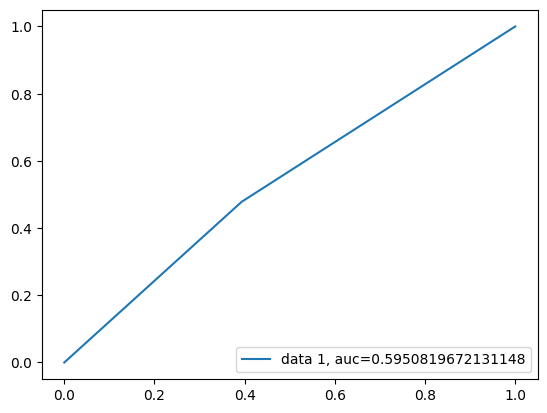

In [32]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_true,  binary_predictions) #False positive (speficifity) and true positive (sensitivity) rate
auc = metrics.roc_auc_score(y_true, predictions) 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'y_true' contains the true labels for the test dataset

# Define a range of thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize variables to store best threshold and corresponding metrics
best_threshold = None
best_f1_score = 0.0

# Iterate through thresholds
for threshold in thresholds:
    # Convert predictions to binary based on the threshold
    binary_predictions = (predictions >= threshold).astype(int).flatten()

    # Calculate metrics
    precision = precision_score(y_true, binary_predictions, pos_label=0)
    recall = recall_score(y_true, binary_predictions, pos_label=0)
    f1 = f1_score(y_true, binary_predictions, pos_label=0)

    # Print or store metrics for analysis
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Update best threshold if F1-score improves
    if f1 > best_f1_score:
        best_threshold = threshold
        best_f1_score = f1

# Print the best threshold
print(f"\nBest Threshold: {best_threshold:.2f}, Best F1 Score: {best_f1_score:.4f}")


Threshold: 0.10, Precision: 0.3067, Recall: 0.3770, F1: 0.3382
Threshold: 0.20, Precision: 0.2727, Recall: 0.4426, F1: 0.3375
Threshold: 0.30, Precision: 0.2712, Recall: 0.5246, F1: 0.3575
Threshold: 0.40, Precision: 0.2518, Recall: 0.5738, F1: 0.3500
Threshold: 0.50, Precision: 0.2357, Recall: 0.6066, F1: 0.3394
Threshold: 0.60, Precision: 0.2222, Recall: 0.6230, F1: 0.3276
Threshold: 0.70, Precision: 0.2165, Recall: 0.6885, F1: 0.3294
Threshold: 0.80, Precision: 0.2277, Recall: 0.8361, F1: 0.3579
Threshold: 0.90, Precision: 0.2154, Recall: 0.8689, F1: 0.3453

Best Threshold: 0.80, Best F1 Score: 0.3579


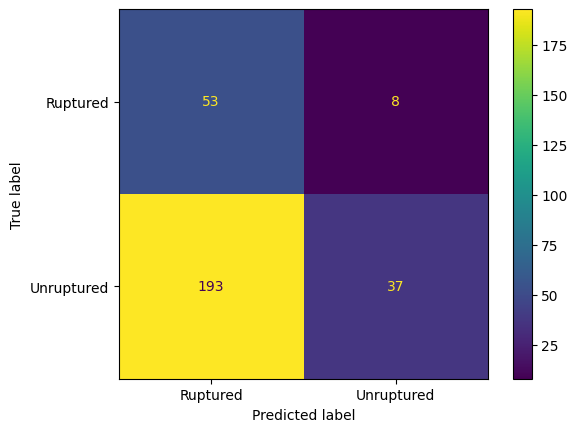

In [35]:
best_binary_predictions = (predictions >= best_threshold).astype(int).flatten()
confusion_matrix = metrics.confusion_matrix(y_true, best_binary_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ruptured', 'Unruptured'])

cm_display.plot()
plt.show()